<a href="https://colab.research.google.com/github/junya-0504/homepage/blob/master/IS_DataStructure3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Rooted Tree in Python

In [7]:
class Node():
    def __init__(self,k):
        self.key = k
        self.parent = self.right = self.left = None

class BinTree():
    def __init__(self):
        self.root = None

    def printAll(self):
        self.prt(self.root)
    def prt(self,node):
        if node == None:
            return
        print(node.key, end=',')
        self.prt(node.left)
        self.prt(node.right)
#
bt = BinTree()
bt.root = Node('root')
bt.root.left = Node('left')
bt.root.left.parent = bt.root
bt.root.right = Node('right') 
bt.root.right.parent = bt.root
bt.printAll()

### Short Practice
Compose a tree illustrated below manually.
 You don't have to make insertion method.
 Just connect by assignment one-by-one

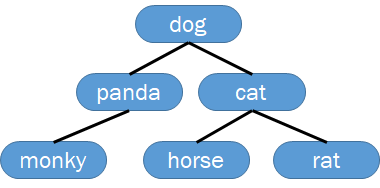

In [2]:
dog = Node('dog')
panda = Node('panda')
cat = Node('cat')
monky = Node('monky')
horse = Node('horse')
rat = Node('rat')
bt = BinTree()
# ... connect all animals

#print: result should be "dog,panda,monky,cat,horse,rat,"
bt.printAll()

dog,panda,monky,cat,horse,rat,

# Left-child, right-sibling representation

In [8]:
class Node2():
    def __init__(self,k):
        self.key = k
        self.parent = self.sibling = self.child = None

class SibTree():
    def __init__(self):
        self.root = None

    def printAll(self):
        self.prt(self.root)
    def prt(self,node):
        if node == None:
            return
        print('[', end='')
        print(node.key, end=',')
        self.prt(node.sibling)
        self.prt(node.child)
        print(']', end='')
#
bt = SibTree()
bt.root = Node2('root')
bt.root.child = Node2('child')
bt.root.child.parent = bt.root
bt.root.sibling = Node2('sibling') 
bt.root.sibling.parent = bt.root
bt.printAll()

[root,[sibling,][child,]]

### Short Practice
Compose a tree illustrated below manually.
 You don't have to make insertion method.
 Just connect by assignment one-by-one

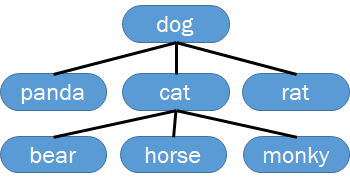

In [ ]:
dog = Node2('dog')
panda = Node2('panda')
cat = Node2('cat')
monky = Node2('monky')
horse = Node2('horse')
rat = Node2('rat')
bear = Node2('bear')
st = SibTree()
# ... connect all animals

#print: result should be "dog,panda,cat,rat,bear,horse,monky,"
st.printAll()

# Graph Representations


## Adjacency List

In this part,we use buil-in list functions.
Adjacency list can be represented as list of list.
If Graoph has N nodes, body is N sized list that has flexible list of adjacency from each node.
Adding adjacency is also simple. If you want add adjaeny from node i to node j, you just append j to the tail of i-th (actually i-1) list.

In [6]:
class MyGraphList:
    def __init__(self, n):
        self.adjbody = []
        for i in range(n):
            self.adjbody.append([])
    def adj(self,v1,v2):
        self.adjbody[v1-1].append(v2)

g = MyGraphList(5)
g.adj(1,2)
g.adj(1,5)
g.adj(2,1)
g.adj(2,5)
g.adj(2,3)
g.adj(2,4)
g.adj(3,2)
g.adj(3,4)
g.adj(4,2)
g.adj(4,5)
g.adj(4,3)
g.adj(5,4)
g.adj(5,1)
g.adj(5,2)
print(g.adjbody)


[[2, 5], [1, 5, 3, 4], [2, 4], [2, 5, 3], [4, 1, 2]]


## Adjacency Maxtrix
We just use Python's list of list for simplicity.
Therefore, structure of the body is actually very similar to the List version. You will have N size list of N size list containing value 0 or 1. Obviously this matrix takes more size than previous representation.

In [2]:
class MyGraphMatrix:
    def __init__(self, n):
        self.adjbody = []
        for i in range(n):
            self.adjbody.append([0]*n)
    def adj(self,v1,v2):
        self.adjbody[v1-1][v2-1]=1

g = MyGraphMatrix(5)
g.adj(1,2)
g.adj(1,5)
g.adj(2,1)
g.adj(2,5)
g.adj(2,3)
g.adj(2,4)
g.adj(3,2)
g.adj(3,4)
g.adj(4,2)
g.adj(4,5)
g.adj(4,3)
g.adj(5,4)
g.adj(5,1)
g.adj(5,2)
print(g.adjbody)


[[0, 1, 0, 0, 1], [1, 0, 1, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 0, 1], [1, 1, 0, 1, 0]]


# Mini Report

Extend the MyGraphMatrix by adding two methods:

1. method qadj(i,j) to judge whether thre is a path from i to j.
> example: qadj(2,5) returns True or False
2. method trypath(path) to verify given path is valid (traversable) or not. Path is given as a list of int.
> example: trypath([1,2,3,4]) returns True of False

In [15]:
class MyGraphMatrix2(MyGraphMatrix):
  def qadj(self,i,j):
    return self.adjbody[i-1][j-1] # exist path -> 1, no path -> 0
  def trypath(self,l):
    count = 0
    for i in range(len(l)-1):
      count += self.qadj(l[i],l[i+1]) # calculate number of path
    if count == len(l)-1: # exist all path
      return True
    return False
 
g = MyGraphMatrix2(5)
g.adj(1,2)
g.adj(1,5)
g.adj(2,1)
g.adj(2,5)
g.adj(2,3)
g.adj(2,4)
g.adj(3,2)
g.adj(3,4)
g.adj(4,2)
g.adj(4,5)
g.adj(4,3)
g.adj(5,4)
g.adj(5,1)
g.adj(5,2)
print(g.adjbody)
print(g.trypath([1,2,5,4,3]))
print(g.trypath([1,3,5,4,3]))
print(g.trypath([1,2,4,3,5]))
print(g.trypath([1,2,4,3,2,5]))

[[0, 1, 0, 0, 1], [1, 0, 1, 1, 1], [0, 1, 0, 1, 0], [0, 1, 1, 0, 1], [1, 1, 0, 1, 0]]
True
False
False
True
